### MNIST 텐서플로우 실습
* 텐서플로우를 활용한 숫자 인식
----
1. 데이터의 형태를 확인한다
2. 동일사이즈인지 동일형태(정보량)인지
3. 데이터를 형태에 맞게 조작
---
### MNIST DATA
* 55000 train data
* 10000 test data
* 5000 validation data
* 28*28 =784byte image data

#####  라이브러리 불러오기
* Anaconda prompt 관리자 권한으로 실행
* pip install tensorflow==1.5.0

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Mnist data example 가져오기

In [168]:
from tensorflow.examples.tutorials.mnist import input_data
mnist= input_data.read_data_sets("c:/MnistData",one_hot=True)

Extracting c:/MnistData\train-images-idx3-ubyte.gz
Extracting c:/MnistData\train-labels-idx1-ubyte.gz
Extracting c:/MnistData\t10k-images-idx3-ubyte.gz
Extracting c:/MnistData\t10k-labels-idx1-ubyte.gz


#### 데이터 성격 확인하기

In [169]:
print('train data sahpe:',mnist.train.images.shape)
print('train label shape',mnist.train.labels.shape)
#print(mnist.train.images[0])
print(mnist.train.labels[0])


train data sahpe: (55000, 784)
train label shape (55000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


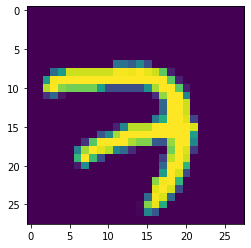

In [170]:
data1=mnist.train.images[0]
imagedata1=data1.reshape([28,28])
plt.imshow(imagedata1)

#### 텐서플로우를 활용한 학습
* 데이터 설정(placeholder)
     - images 데이터 입력부: xdata
     - labels 데이터 입력부: ydata    

In [171]:
xdata=tf.placeholder(tf.float32,[None,784])
ydata=tf.placeholder(tf.float32,[None,10])


#### 모델 설정
* 변수 설정(Variable)
* label_data = weight * image_data + bias
* 히든 레이어 설정 행 갯수 = 뒷 열 갯수  가중치 설정

In [172]:
arg1=784
arg2=64
arg3=10

W1= tf.Variable(tf.ones([784,arg1]))
b1= tf.Variable(tf.zeros([arg1]))

W2= tf.Variable(tf.ones([arg1,arg2]))
b2= tf.Variable(tf.zeros([arg2]))

W2= tf.Variable(tf.ones([arg2,arg3]))
b2= tf.Variable(tf.zeros([arg3]))


#### 레이어 형성
 * dnn에서 베니싱 현상(가중치 영향이 사라지는 문제) 
 * relu 액티베이션 함수를 사용 

In [173]:
m1=tf.matmul(xdata,W1)+b1
L1= tf.nn.relu(m1)

m2=tf.matmul(L1,W2)+b2
L2= tf.nn.relu(m2)

y=tf.matmul(L2,W3)+b3
#y_=tf.nn.softmax(y)

ValueError: Dimensions must be equal, but are 784 and 64 for 'MatMul_17' (op: 'MatMul') with input shapes: [?,784], [64,10].

#### 손실지정
* 크로스 엔트로피 사용 픽셀이 가지는 정보량 평균
* 크로스 엔트로피를 최소화 하는 가중치 학습
* 크로스 엔트로피 에러는 loss cost error 등으로 표시


In [ ]:
cost=tf.nn.softmax_cross_entropy_with_logits_v2(labels=ydata, logits=y_)
cross_entropy = tf.reduce_mean(cost)

In [ ]:
info=ydata*tf.log(y_)
cross_entropy=tf.reduce_mean(-tf.reduce_sum(info,reduction_indices=[1]))

#### 옵티마이저 설정
* 옵티마이저 : GD, Adam 등...
* 트레이닝 단계 설정

In [ ]:
lr=1 # 학습률 learning rate
#optimizer=tf.train.GradientDescentOptimizer(lr)
#다용도 사용 가능한 Adom
optimizer=tr.train.AdamOptimizer(lr)
train_step=optimizer.minimize(cross_entropy)



#### 세션 생성및 실행
* Variable 이 있으면 변수 초기화 실행


In [ ]:
init = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [ ]:
total=100
tr_x=[]
tr_y=[]
for i in range(total):    
    batch_xs,batch_ys=mnist.train.next_batch(100)
    fd={xdata:batch_xs,ydata:batch_ys}
    sess.run(train_step,feed_dict=fd)
    #정확도 accuracy 테스트
    prediction=tf.equal(tf.argmax(ydata,1),tf.argmax(y_,1))
    acc=tf.reduce_mean(tf.cast(prediction,tf.float32))
    tfd={xdata:mnist.test.images,ydata:mnist.test.labels}
    output=sess.run(acc,feed_dict=tfd)
    tr_x.append(i)
    tr_y.append(output)
    #print("step:",i,", acc:",output)
    if(i%10==0):
        print("step:",i,", acc:",output)


#### 분석하기
* 학습률 분석
* 가중치 분석


In [ ]:
#plt.plot(tr_x,tr_y)
#plt.show()

In [ ]:
W1 = sess.run(W) #[784,10]
b1_ = sess.run(b)
MT_= W1_.T
for i in range(10):
    w_img = MT_[i].reshape([28,28])
    plt.subplot(2,5,i+1)
    plt.imshow(w_img,cmap='bwr')
plt.show()
#print(W_.shape)
#print(W_[0])
#print(W_[350])

In [ ]:
img=np.fromfile('7.rawraw',dtype='int8')
img=img+np.ones([784])
#print(img)
imgdata=img.reshape([28,28])

# 실제 구동률
answer=np.matmul(img,W_)+b_
print(answer)

# 실제 확정 값 
result=np.argmax(answer,axis=0)
print("답은:",result)
plt.imshow(imgdata)
plt.show()
#print(img.shape)


In [ ]:
#sess.close()